In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# (a) Data Exploration and preparation:

## Load the dataset and perform initial data exploration.

In [4]:
df_train = pd.read_csv(r"C:\Users\otaku7\Desktop\project\mnist_train.csv")


In [5]:
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.shape

(60000, 785)

## Identify the number of unique classes.

In [7]:
df_train['label'].nunique()

10

In [8]:
df_train['label'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

## Identify the number of features.

In [9]:
len(df_train.columns)-1 # -1 for target

784

## Check for missing values

In [10]:
df_train.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [11]:
df_train.isnull().sum().sum()

0

## some Visualization for label in training data

Text(0.5, 1.0, 'Number of Labels')

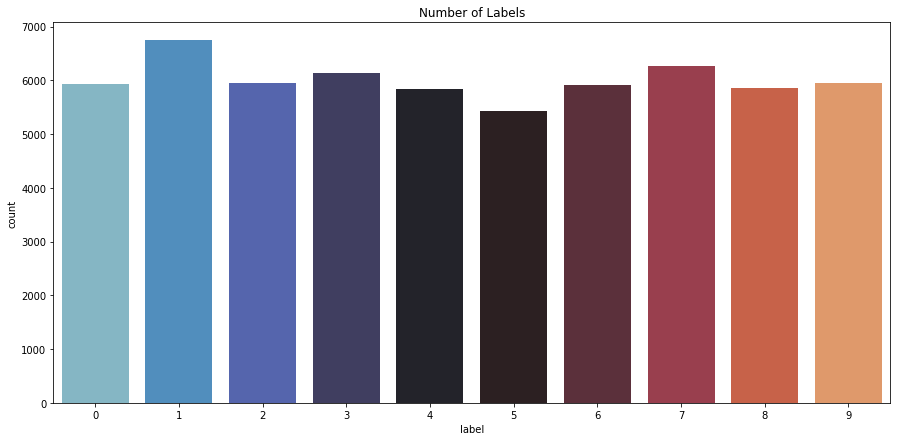

In [12]:
plt.figure(figsize = (15,7))
sns.countplot(x = df_train['label'], palette = "icefire")
plt.title("Number of Labels")

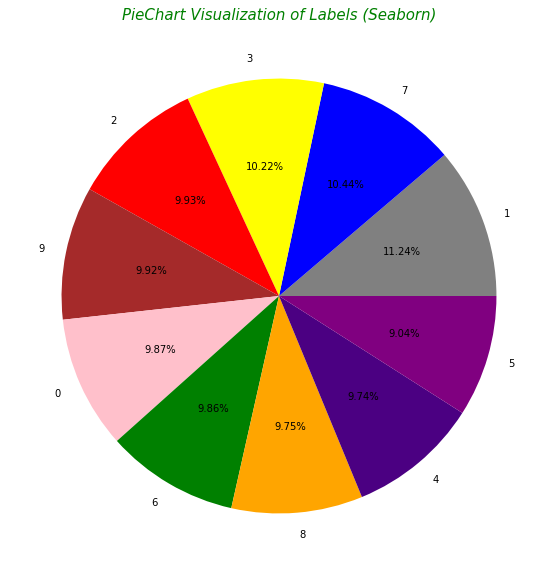

In [13]:
xlabel = df_train['label'].value_counts().index
colors = ["grey","blue","yellow","red","brown","pink","green","orange","indigo","purple"]
explode = [0,0,0,0,0,0,0,0,0,0]
sizes =  df_train['label'].value_counts().values

plt.figure(figsize = (10,10))
plt.pie(sizes ,explode = explode, labels = xlabel, colors = colors, autopct = "%.2f%%")
plt.title("PieChart Visualization of Labels (Seaborn)", color = "green", fontsize = 15, fontstyle = "italic")
plt.show()

## Normalize each image by dividing each pixel by 255.

In [14]:
X = df_train.drop(labels = ["label"],axis = 1)
y = df_train["label"]

In [15]:
y.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [16]:
X_norm = X / 255.0

In [17]:
X_norm.shape

(60000, 784)

## Resize images to dimensions of 28 by 28

In [18]:
X_reshape = X_norm.values.reshape(-1,28,28)

In [19]:
X_reshape.shape

(60000, 28, 28)

In [20]:
y.shape

(60000,)

## visualize some images to verify the correctness of the reshaping process.

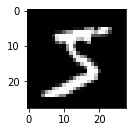

In [21]:
plt.subplot(2,2,1)
img1 = X_reshape[0]
plt.imshow(img1, cmap = 'gray')

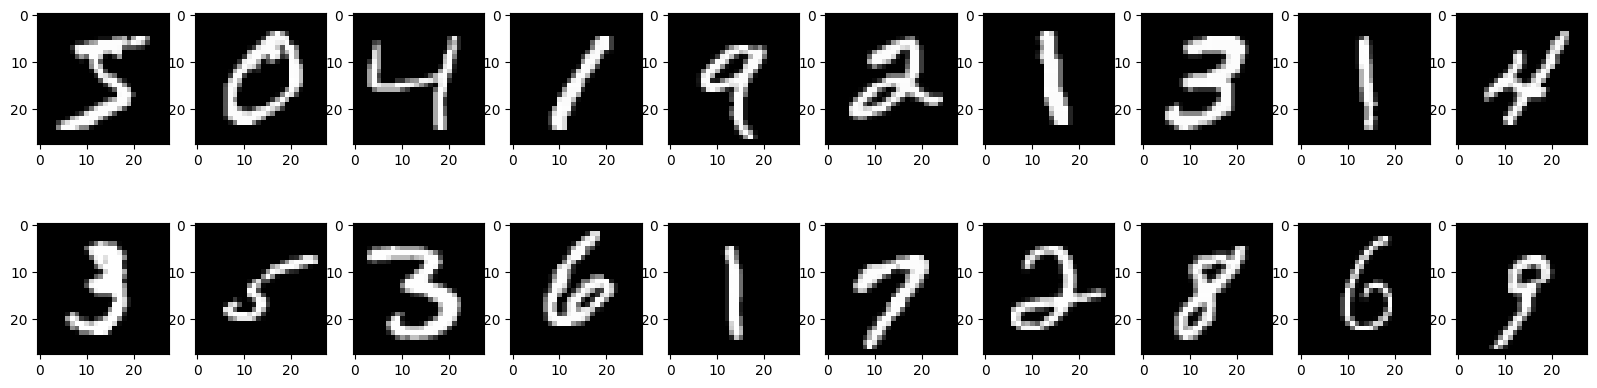

In [141]:
plt.figure(figsize=(20,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_reshape[i],cmap='gray')

## Split the training data (mnist_train) into training and validation sets.


# KNN

In [142]:
X_ktrain, X_kval, y_ktrain, y_kval = train_test_split(X_norm, y, test_size=0.2, random_state=42)


In [143]:
# Implement the K-NN algorithm for classification
knn = KNeighborsClassifier()

# Define hyperparameters to search
param_grid = {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']}
# Utilize a grid search technique to determine the optimal hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_ktrain, y_ktrain)
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the model on the validation set
knn_acc = grid_search.score(X_kval, y_kval)
print(f"Accuracy of knn: {knn_acc}")


Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy of knn: 0.9735833333333334


In [22]:
knn__acc= 0.9735833333333334
X_train,X_val,Y_train,Y_val = train_test_split(X_reshape,y,test_size = 0.2, random_state = 30)
print("X_train Shape:",X_train.shape)
print("X_val Shape:",X_val.shape)

print("Y_train Shape:",Y_train.shape)
print("Y_val Shape:",Y_val.shape)

X_train Shape: (48000, 28, 28)
X_val Shape: (12000, 28, 28)
Y_train Shape: (48000,)
Y_val Shape: (12000,)


# ANN

In [23]:
# Subsequent Experiment: ANN
def ann_model(hidden_neurons, learning_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(hidden_neurons, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [24]:
nn1=ann_model(128, 0.01)

In [25]:
nn1.fit(X_train, Y_train, epochs=25, batch_size=32)

Epoch 1/25
1500/1500 [==============================] - 6s 1ms/step - loss: 0.3314 - accuracy: 0.9015
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2481 - accuracy: 0.9295
Epoch 3/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2292 - accuracy: 0.9360
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2175 - accuracy: 0.9408
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2049 - accuracy: 0.9444
Epoch 6/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1932 - accuracy: 0.9487
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1947 - accuracy: 0.9485
Epoch 8/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1886 - accuracy: 0.9513
Epoch 9/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1905 - accuracy: 0.9519
Epoch 10/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.176

In [26]:
loss, nn1_acc = nn1.evaluate(X_val,Y_val )
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, nn1_acc))

375/375 [==============================] - 4s 729us/step - loss: 0.3011 - accuracy: 0.9622

Testing loss: 0.30, acc: 0.96%


In [27]:
nn2=ann_model(256, 0.001)

In [28]:
nn2.fit(X_train, Y_train, epochs=30, batch_size=64)

Epoch 1/30
750/750 [==============================] - 5s 2ms/step - loss: 0.3088 - accuracy: 0.9120
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 0.1437 - accuracy: 0.9576
Epoch 3/30
750/750 [==============================] - 2s 2ms/step - loss: 0.1045 - accuracy: 0.9690
Epoch 4/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0799 - accuracy: 0.9764
Epoch 5/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0643 - accuracy: 0.9805
Epoch 6/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0555 - accuracy: 0.9828
Epoch 7/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0465 - accuracy: 0.9853
Epoch 8/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0392 - accuracy: 0.9872
Epoch 9/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0344 - accuracy: 0.9885
Epoch 10/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0299 - accuracy: 0.9905

In [29]:
loss, nn2_acc = nn2.evaluate(X_val,Y_val )
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, nn2_acc))

375/375 [==============================] - 3s 1ms/step - loss: 0.0999 - accuracy: 0.9813

Testing loss: 0.10, acc: 0.98%


# Comparison

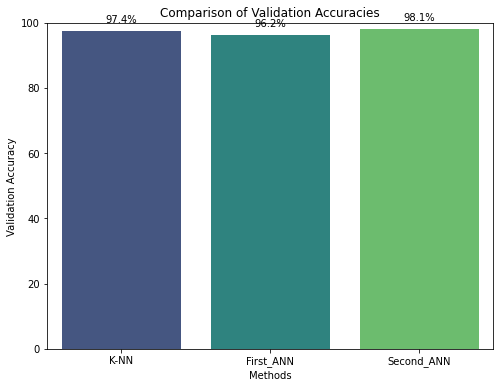

In [30]:
# Assuming you have the validation accuracies for K-NN and the best ANN model
knn_acc1 = knn__acc*100
ann1_acc = nn1_acc*100
ann2_acc=nn2_acc*100

# Create a bar plot for comparison
methods = ['K-NN', 'First_ANN', 'Second_ANN']
accuracies = [knn_acc1, ann1_acc, ann2_acc]

plt.figure(figsize=(8, 6))
plot = sns.barplot(x=methods, y=accuracies, palette="viridis")
plt.ylim(0, 100)  # Set the y-axis limit based on your accuracy range
plt.title('Comparison of Validation Accuracies')
plt.xlabel('Methods')
plt.ylabel('Validation Accuracy')

# Add percentage values on top of the bars
for bar, acc in zip(plot.patches, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{acc:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

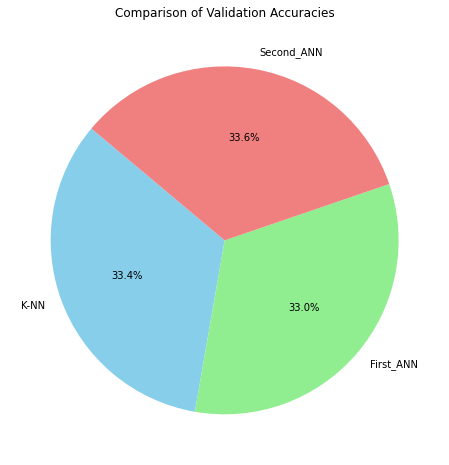

In [47]:
# Assuming you have the validation accuracies for K-NN and ANN model
knn_acc = knn__acc *100 
ann1_acc = nn1_acc*100  
ann2_acc=nn2_acc*100

# Create a pie chart for comparison
methods = ['K-NN', 'First_ANN', 'Second_ANN']
accuracies = [knn_acc, ann1_acc, ann2_acc]


plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=methods, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of Validation Accuracies')
plt.show()

### so best model is ANN with learning_rate=0.001,hidden_neurons=256,epochs=30, batch_size=64

# Confusion Matrix

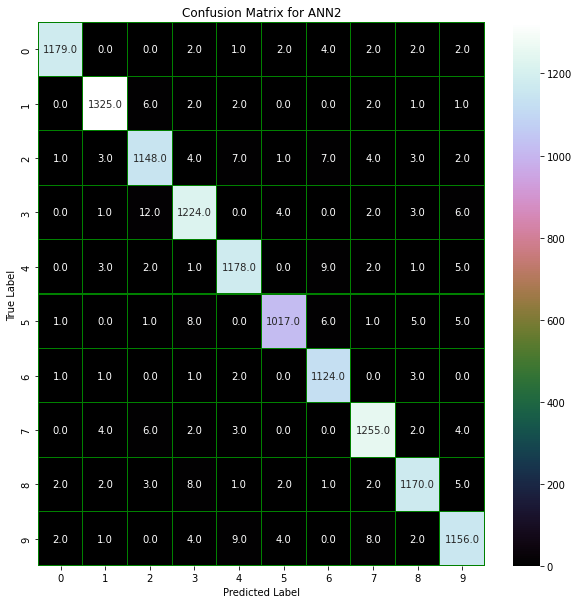

In [31]:
Y_pred = nn2.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)

Y_true = Y_val

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plotting the confusion matrix
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, cmap="cubehelix", linewidths=0.01, linecolor="green", fmt=".1f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for ANN2")
plt.show()


In [32]:
incorrect = np.where(Y_pred_classes != Y_true)[0]
print ("Found %d incorrect labels" % len(incorrect))



Found 224 incorrect labels


# Save best model

In [33]:
from tensorflow.keras.models import save_model

nn2.save("ANN2.h5")


# mnist_test.csv.

In [3]:
df_test = pd.read_csv(r"C:\Users\otaku7\Desktop\project\mnist_test.csv")

In [4]:
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.isnull().sum().sum()

0

In [36]:
X_test = df_test.drop(labels = ["label"],axis = 1)
Y_test = df_test["label"]

In [37]:
X_test = X_test / 255.0

In [38]:
X_test = X_test.values.reshape(-1,28,28)

# Load Model

In [39]:
loaded_model = load_model("ANN2.h5")


In [40]:
loaded_model

In [41]:
pred=loaded_model.predict(X_test)

In [42]:
pred_labels = np.argmax(pred, axis=1)

In [43]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, pred_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.96%


7


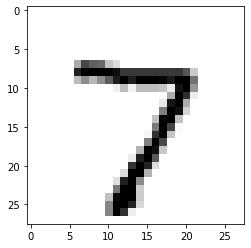

In [44]:
import numpy as np
print(np.argmax(pred[0]))
plt.imshow(X_test[0],cmap=plt.cm.binary)
plt.show()

In [45]:
Y_pred_classes = np.argmax(pred, axis=1)
incorrect = np.where(Y_pred_classes != Y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))



Found 204 incorrect labels
